In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/clean_churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


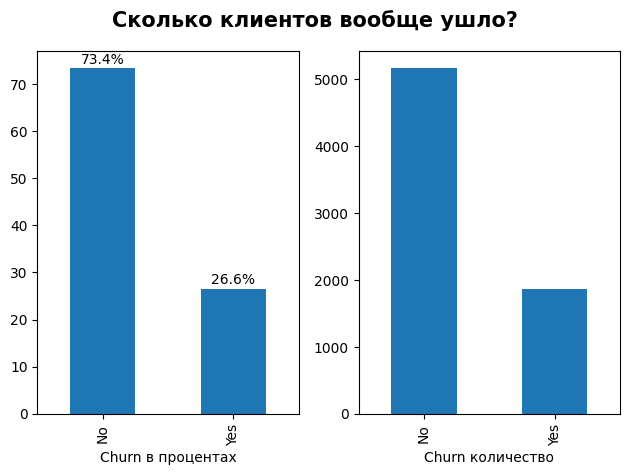

In [2]:
fig, ax = plt.subplots(1, 2)

pct = (df['Churn'].value_counts(normalize=True))*100
cnt = df['Churn'].value_counts()

pct.plot(kind = 'bar', ax = ax[0])

for i, v in enumerate(pct.values):
    ax[0].text(i, v+1, f'{v:.1f}%', ha = 'center')

cnt.plot(kind = 'bar', ax = ax[1])
ax[0].set_xlabel('Churn в процентах', fontsize = 10)
ax[0].set_ylabel('')
ax[1].set_xlabel('Churn количество', fontsize = 10)

fig.suptitle("Сколько клиентов вообще ушло?", fontsize = 15, fontweight='bold')

fig.tight_layout()

fig.savefig('figures\\bar_churn_comp.png')

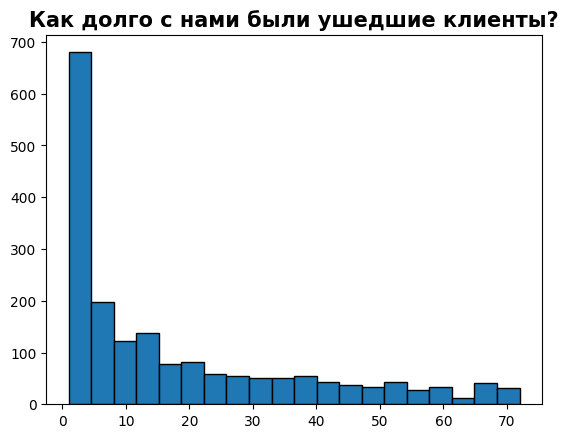

In [3]:
df[df['Churn'] == 'Yes']['tenure'].plot(kind = 'hist', bins = 20, edgecolor = 'black')
plt.ylabel("")
plt.title("Как долго с нами были ушедшие клиенты?", fontsize = 15, fontweight='bold')
plt.savefig('figures\\churn_clients_time.png')

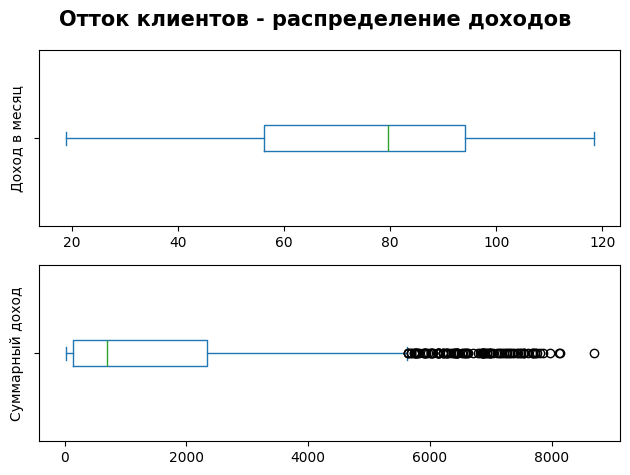

In [4]:
fig, ax = plt.subplots(2, 1)
df[df['Churn'] == 'Yes']['MonthlyCharges'].plot(kind = 'box', vert = False, ax = ax[0], label = '')
ax[0].set_ylabel('Доход в месяц', fontsize = 10)
df[df['Churn'] == 'Yes']['TotalCharges'].plot(kind = 'box', vert = False, ax = ax[1], label = '')
ax[1].set_ylabel('Суммарный доход', fontsize = 10)

fig.suptitle("Отток клиентов - распределение доходов", fontsize = 15, fontweight='bold',)

fig.tight_layout()

fig.savefig('figures\\churn_charges_comp.png')

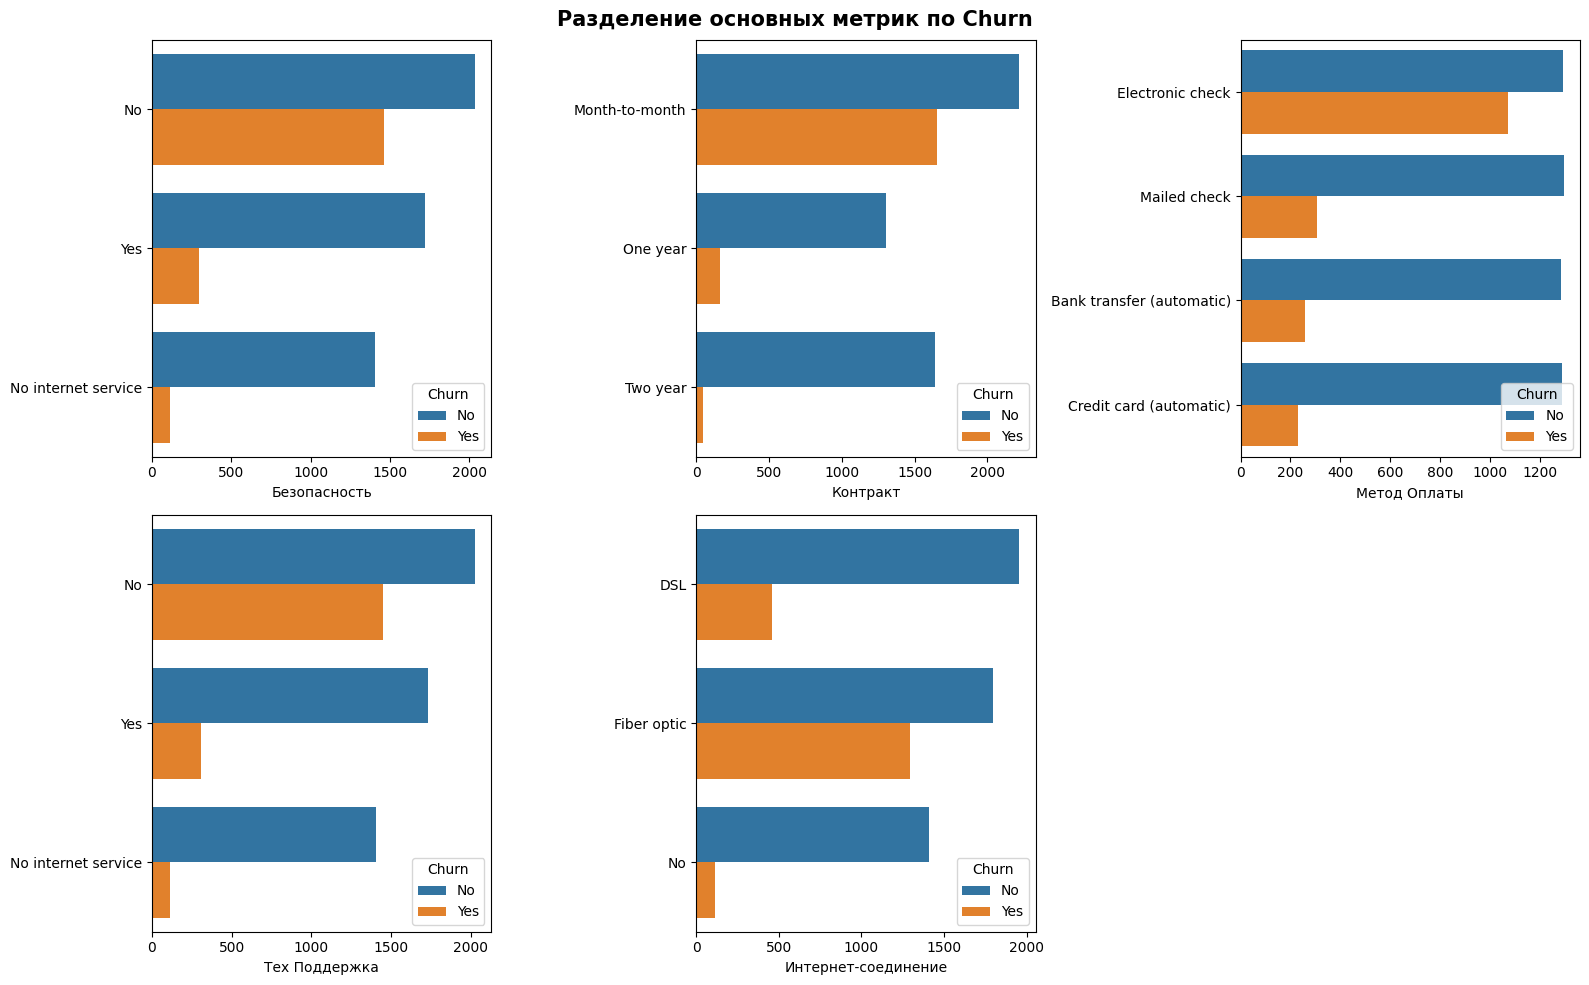

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(16, 10))

sns.countplot(y='OnlineSecurity', hue = 'Churn', data=df, ax = ax[0,0])
ax[0, 0].set_xlabel('Безопасность', fontsize = 10)
ax[0, 0].set_ylabel('')
sns.countplot(y='Contract', hue = 'Churn', data=df, ax = ax[0,1])
ax[0, 1].set_xlabel('Контракт', fontsize = 10)
ax[0, 1].set_ylabel('')
sns.countplot(y='PaymentMethod', hue = 'Churn', data=df, ax = ax[0,2])
ax[0, 2].set_xlabel('Метод Оплаты', fontsize = 10)
ax[0, 2].set_ylabel('')
sns.countplot(y='TechSupport', hue = 'Churn', data=df, ax = ax[1,0])
ax[1, 0].set_xlabel('Тех Поддержка', fontsize = 10)
ax[1, 0].set_ylabel('')
sns.countplot(y='InternetService', hue = 'Churn', data=df, ax = ax[1,1])
ax[1, 1].set_xlabel('Интернет-соединение', fontsize = 10)
ax[1, 1].set_ylabel('')

ax[1,2].set_visible(False)

fig.suptitle("Разделение основных метрик по Churn", fontsize = 15, fontweight='bold',)
fig.tight_layout()

fig.savefig('figures\\churn_metrics_comp.png')

#sns.countplot(y='Contract', hue='Churn', data=df, order=df['Contract'].value_counts().index)

In [6]:
df_grouped = df.copy()
df_grouped['Churn'] = df_grouped['Churn'].map({'Yes': 1, 'No': 0})

contract = df_grouped.groupby(by='Contract')['Churn'].mean()*100

security = df_grouped.groupby(by='OnlineSecurity')['Churn'].mean()*100

payment = df_grouped.groupby(by='PaymentMethod')['Churn'].mean()*100

techsup = df_grouped.groupby(by='TechSupport')['Churn'].mean()*100

service = df_grouped.groupby(by='InternetService')['Churn'].mean()*100

grouped_series = [contract, security, payment, techsup, service]

for i, series in enumerate(grouped_series):
    grouped_series[i] = series.to_frame().map('{:.1f}%'.format)

final_groups = pd.concat([series for series in grouped_series],
keys=['Contract', 'Security', 'Payment', 'Techsup', 'Service']       
)

final_groups = final_groups.rename(columns = {'Churn':'ПРОЦЕНТ УТЕЧКИ'})
final_groups

ПРОЦЕНТ УТЕЧКИ
Contract Month-to-month                     42.7%
         One year                           11.3%
         Two year                            2.8%
Security No                                 41.8%
         No internet service                 7.4%
         Yes                                14.6%
Payment  Bank transfer (automatic)          16.7%
         Credit card (automatic)            15.3%
         Electronic check                   45.3%
         Mailed check                       19.2%
Techsup  No                                 41.6%
         No internet service                 7.4%
         Yes                                15.2%
Service  DSL                                19.0%
         Fiber optic                        41.9%
         No                                  7.4%

In [7]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Churn']
df_corr = df[num_cols].copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})
corr_matrix = df_corr.corr()
print(corr_matrix)

                  tenure  MonthlyCharges  TotalCharges  SeniorCitizen  \
tenure          1.000000        0.246862      0.825880       0.015683   
MonthlyCharges  0.246862        1.000000      0.651065       0.219874   
TotalCharges    0.825880        0.651065      1.000000       0.102411   
SeniorCitizen   0.015683        0.219874      0.102411       1.000000   
Churn          -0.354049        0.192858     -0.199484       0.150541   

                   Churn  
tenure         -0.354049  
MonthlyCharges  0.192858  
TotalCharges   -0.199484  
SeniorCitizen   0.150541  
Churn           1.000000  


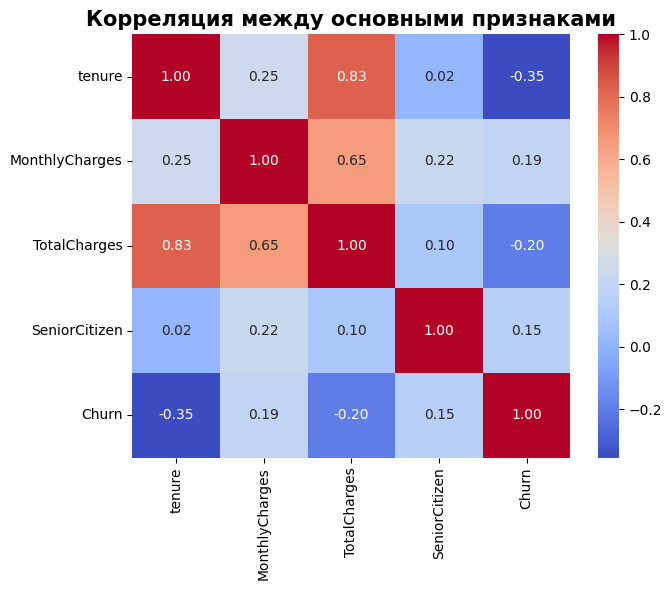

In [8]:
plt.figure(figsize = (7,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляция между основными признаками", fontsize = 15, fontweight='bold')
plt.tight_layout()

plt.savefig('figures\\churn_corr_heatmap.png')